# LASSO Regression

This notebook optimizes the following problem:

$$ ||X\beta-y||_2^2 + \alpha||\beta||_1$$

Specifically, we compare subgradient and proximal gradient descent.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Here we create a test dataset with 5001 examples and 5000 features.

In [20]:
p = 5000
n = 5001
xStar = np.zeros((p))
xStar[np.floor(p*np.random.rand(200,1)).astype(np.int)]=1
xStar = xStar*np.random.normal(0,10,(p,))

# Generate A and b. b = Ax + error
X = np.random.randn(n,p)
y = X.dot(xStar) + np.random.randn(n)
y = y.flatten()
print 'Number Non-zero:', len([x for x in xStar if x != 0])

(5000,)
Number Non-zero: 193


We will run each test for 100 iterations with alpha value of 0.1.

The learning rate for subgradient descent is set to 0.0001.

In [4]:
max_iters = 100
learning_rate = 0.0001
beta_rand = np.random.random((X.shape[1],))*10.
alpha = .1

## Subgradient Descent

In [5]:
def grad_l1(beta, alpha):
    grad = np.zeros(beta.shape)
    grad[beta > 0] = 1.*alpha
    grad[beta < 0] = -1.*alpha
    grad[beta == 0] = 0.
    return grad

In [6]:
def grad_least_squares(beta, X, y):
    return (X.dot(beta)-y).dot(X)

In [7]:
def objective(beta, X, y, alpha):
    cost = ((X.dot(beta)-y)**2).sum() + alpha*np.absolute(beta).sum()
    return cost

In [8]:
beta = beta_rand.copy()

In [11]:
sub_grads = []
best_obj = None
sub_grads.append(np.linalg.norm(beta-xStar))
sub_grads2.append(np.absolute(objective(beta, X, y,alpha)-objective(xStar,X,y,alpha)))
for i in range(max_iters):
    gs = grad_least_squares(beta, X, y)
    g_l1 = grad_l1(beta, alpha)
    grad = gs+g_l1           
    beta = beta - learning_rate * grad
    sub_grads.append(np.linalg.norm(beta-xStar))
    
print 'loss: %.4f learning_rate: %.10f' % (objective(beta, X, y, alpha), learning_rate)

loss: 312605.9561 learning_rate: 0.0001000000


In [12]:
beta_sg = beta.copy()

## Proximal Gradient Descent

In [21]:
def soft_thresh(beta, alpha):
    return np.sign(beta)*np.maximum(0, np.absolute(beta)-alpha)

In [22]:
beta = beta_rand.copy()
gamma = .1

In [23]:
prox_grads2 = []
prox_grads = []
prox_grads.append(np.linalg.norm(beta-xStar))
prox_grads2.append(np.absolute(objective(beta, X, y,alpha)-objective(xStar,X,y,alpha)))
for i in range(max_iters):
    # Backtracking line search is used for setting the learning rate
    learning_rate = 1.
    grad = grad_least_squares(beta, X, y)  
    while True:
        m = objective(beta,X,y,alpha) + (learning_rate)*(grad.T.dot(grad))
        if objective(beta-learning_rate*grad,X,y,alpha) > m:
            learning_rate = gamma*learning_rate
        else:
            break
    beta_m1 = beta       
    beta = soft_thresh(beta - learning_rate*
                       grad, alpha)
    prox_grads.append(np.linalg.norm(beta-xStar))
    prox_grads2.append(np.absolute(objective(beta, X, y,alpha)-objective(xStar,X,y,alpha)))
    
print 'loss: %.4f learning_rate: %.20f' % (objective(beta, X, y, alpha), learning_rate) 
#print beta

loss: 43610.9627 learning_rate: 0.00010000000000000003


In [24]:
print 'Num Non-zero:', len([x for x in beta if x != 0])

Num Non-zero: 192


In [16]:
beta_pg = beta.copy()

## Analysis

Here we plot the convergence of the subgradient and proximal method.

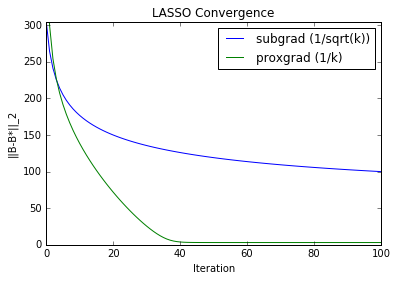

In [17]:
sub_grads1 = np.array(sub_grads)
prox_grads1 = np.array(prox_grads)

plt.plot(range(sub_grads1.shape[0]), sub_grads1)
plt.plot(range(prox_grads1.shape[0]), prox_grads1)
plt.legend(['subgrad (1/sqrt(k))','proxgrad (1/k)'], loc='upper right')
plt.axis([0,100,0,sub_grads1[0:].max()])
plt.ylabel('||B-B*||_2')
plt.xlabel('Iteration')
plt.title('LASSO Convergence')
plt.show()

In [18]:
num_non_zero_xStar = len([x for x in xStar if x > 0])
num_non_zero_pg = len([x for x in beta_pg if x > 0])
num_non_zero_sg = len([x for x in beta_sg if x > 0])
print 'nnz_bStar: %d nnz_sg: %d nnz_pg: %d' % (num_non_zero_xStar, num_non_zero_sg,
                                               num_non_zero_pg)

nnz_bStar: 96 nnz_sg: 3010 nnz_pg: 94


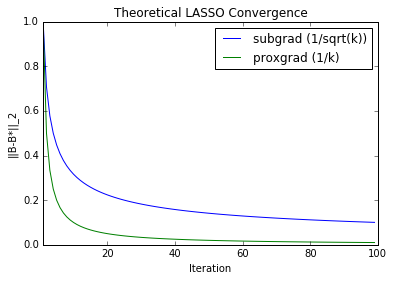

In [19]:
plt.plot(range(1,100),1/(np.sqrt(range(1,100))))
plt.plot(range(1,100),1./(np.array(range(1,100))))
plt.legend(['subgrad (1/sqrt(k))','proxgrad (1/k)'], loc='upper right')
plt.ylabel('||B-B*||_2')
plt.xlabel('Iteration')
plt.title('Theoretical LASSO Convergence')
plt.axis([1,100,0,1])
plt.show()